회귀분석은 독립변수  $x$ 에 대응하는 종속변수  $y$ 와 가장 비슷한 값 $\hat{y}$ 를 출력하는 함수  $f(x)$ 를 찾는 과정이다.

<center>$\hat{y}=f(x)≈y$</center>
 
만약  f(x) 가 다음과 같은 선형함수면 이 함수를 선형회귀모형(linear regression model)이라고 한다. 선형회귀모형을 사용하는 회귀분석은 선형회귀분석이라고 한다.

<center>$\hat{y}=w_0+w_1x_1+w_2x_2+⋯+w_Dx_D=w_0+w^Tx$</center>
 
위 식에서 독립변수  $x=(x_1,x_2,…,x_D)$ 는  D 차원 벡터다. 가중치 벡터  $w=(w_0,⋯,w_D)$ 는 함수  $f(x)$ 의 계수(coefficient)이자 이 선형회귀모형의 모수(parameter)라고 한다.

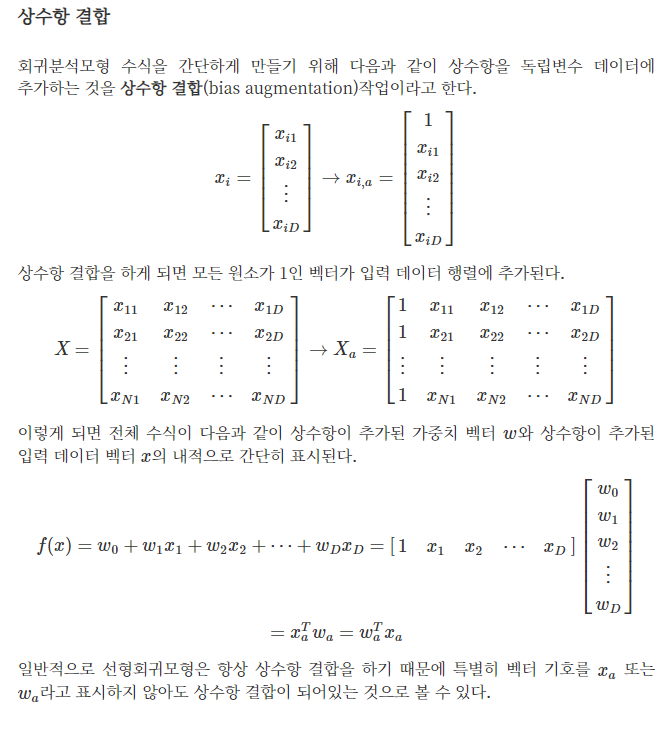

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

In [2]:
X0 = np.arange(10).reshape(5,2)
X0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [3]:
X = sm.add_constant(X0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

최소 자승법(Ordinary Least Squares)

. 잔차제곱합(RSS: Residual Sum of Squares)를 최소화 하는 가중치 벡터를 구하는 방법

In [6]:
from sklearn.datasets import make_regression

bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

$y=100+86.44794301x+ϵ$

In [7]:
w

array(86.44794301)

In [8]:
# OLS 의 해를 직접 이용한 방법
# X의 각 행렬이 서로 독립인 경우 사용할 수 있음
w_pre = np.linalg.inv(X.T @ X) @ X.T @ y
w_pre

array([[99.79150869],
       [86.96171201]])

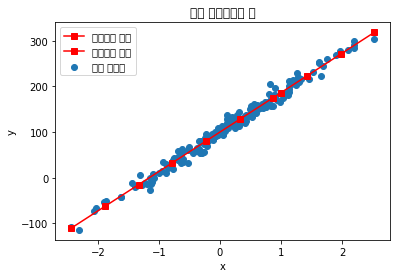

In [9]:
import matplotlib.pyplot as plt
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)+bias

plt.scatter(X0, y, label="원래 데이터")
plt.plot(X_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
# fit_intercetp 인수는 모형에 상수항이 존재하는지 결정하는 인수
# 디폴트 값은 True
model = LinearRegression(fit_intercept=True).fit(X0, y)
# fit 메소드는 상수항 결합을 자동으로 해주기 때문에 따로 데이터에 해줄필요가 없음.
print(model.intercept_, model.coef_)
# intercept : 추정된 상수항
# coef : 추정된 가중치 벡터

[99.79150869] [[86.96171201]]


In [41]:
# 위에서 학습된 모델을 기반으로 X를 대입하여 y값을 예측할 수 있음
model.predict([[-2], [-1], [0], [1], [2]])

array([[-29.88160408],
       [ -4.72080448],
       [ 20.43999512],
       [ 45.60079472],
       [ 70.76159432]])

In [56]:
# StatsModel 을 사용한 회귀 분석
df = pd.DataFrame({"x": X0[:, 0], "y": y[:, 0]})
df.tail()

,x,y
495,-1.199268,-14.995674
496,2.449369,147.283516
497,-0.997020,40.468834
498,-0.625342,-58.000912
499,0.762011,55.510484


In [61]:
# Stats 모델에서는 OLS(Ordinary Least Squre, 최소자승법) 클래스를 사용하여 회귀 분석을 진행함

dfy = df[["y"]]
dfX = sm.add_constant(df[["x"]])
model = sm.OLS(dfy, dfX)
result = model.fit()

C:\Users\ktnet\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [63]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     125.6
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           3.78e-26
Time:                        17:50:19   Log-Likelihood:                -2660.7
No. Observations:                 500   AIC:                             5325.
Df Residuals:                     498   BIC:                             5334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4400      2.222      9.198      0.0